<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/BELTEXAM1/BELT_EXAM1_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BELT EXAM 1
## Hotel Bookings

## Librerias e Importacion

In [161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
#Lectura y Head del df. Se hizo una revision manual previamente
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/Bases_De_Datos/hotel_bookings.csv')
dforiginal = df #dataframe de partida
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## LIMPIEZA DE DATOS

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  object 
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [165]:
### ERRORES ENCONTRADOS ###
#1. children, country, agent y company tienen variables vacias
#2. is_cancelled es un int, deberia ser bool (pero se lo puede dejar como int)
#     arrival_date_week_number es un object
#     children esta descrito como float
#     agent es float y deberia ser objeto(aunque el diccionario dice int)
#     company es float y deberia ser objeto(aunque el diccionario dice int)

### 1. Variables vacias

In [166]:
df[df['children'].isnull()]['children']

40600   NaN
40667   NaN
40679   NaN
41160   NaN
Name: children, dtype: float64

In [167]:
df['children'].fillna(0, inplace = True)
df[df['children'].isnull()]['children'] # reemplazados los nan de children por 0. No afecta mucho esta decision, ya que son solo 4 observaciones.

Series([], Name: children, dtype: float64)

In [168]:
df[df['country'].isnull()]['country']

30        NaN
4127      NaN
7092      NaN
7860      NaN
8779      NaN
         ... 
65908     NaN
65909     NaN
65910     NaN
80830     NaN
101488    NaN
Name: country, Length: 488, dtype: object

In [169]:
df['country'].fillna('N.D.', inplace = True)
df[df['country'].isnull()]['country'] # reemplazados los nan de country por No Definidos. Creando una nueva categoria

Series([], Name: country, dtype: object)

In [170]:
sorted(df['agent'].unique())[0:5] #Ver si no existe un ID de 0 para reemplazar

[nan, 1.0, 2.0, 3.0, 4.0]

In [171]:
df['agent'].fillna(0, inplace = True)
df[df['agent'].isnull()]['agent'] # reemplazados los nan de agent por 0. Creando una nueva categoria

Series([], Name: agent, dtype: float64)

In [172]:
sorted(df['company'].unique())[0:5] #Ver si no existe un ID de 0 para reemplazar

[nan, 6.0, 8.0, 9.0, 10.0]

In [173]:
df['company'].fillna(0, inplace = True)
df[df['company'].isnull()]['company'] # reemplazados los nan de company por 0. Creando una nueva categoria

Series([], Name: company, dtype: float64)

### 2.Correccion de variables

In [175]:
df2 = df
df2['arrival_date_week_number'].unique()

array(['27', '#27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '1', '2', '3', '4', '5', '6',
       '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', 35, 6, 10,
       15, 23, 48, 17, 34, 33, 36, 26, 42, 37, 45, 41, 24, 5, 21, 27, 28,
       25, 14, 4, 38, 53, 40, 44, 51, 8, 11, 7, 39, 43, 52, 16, 20, 3, 47,
       50, 19, 2, 29, 9, 12, 49, 22, 46, 13, 18, 32, 1, 31, 30],
      dtype=object)

In [176]:
reemplazos = {'27' : 27, '#27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35' : 35, '36' : 36,'37' : 37,
              '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51,
              '52': 52, '53': 53, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14,
              '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26}
#lista de reemplazos

In [177]:
df2.replace(reemplazos, regex=True, inplace = True)#Reemplazo de elementos

In [182]:
df2['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 15, 23, 17, 26, 24, 21, 25, 14, 11, 16, 20, 19, 12, 22,
       13, 18])

In [208]:
df2['children'] = df2['children'].apply(np.int64)
df2['children'].unique()

array([ 0,  1,  2, 10,  3])

In [209]:
df2['agent'] = df2['agent'].apply(np.int64)
df2['agent'].unique()

array([  0, 304, 240, 303,  15, 241,   8, 250, 115,   5, 175, 134, 156,
       243, 242,   3, 105,  40, 147, 306, 184,  96,   2, 127,  95, 146,
         9, 177,   6, 143, 244, 149, 167, 300, 171, 305,  67, 196, 152,
       142, 261, 104,  36,  26,  29, 258, 110,  71, 181,  88, 251, 275,
        69, 248, 208, 256, 314, 126, 281, 273, 253, 185, 330, 334, 328,
       326, 321, 324, 313,  38, 155,  68, 335, 308, 332,  94, 348, 310,
       339, 375,  66, 327, 387, 298,  91, 245, 385, 257, 393, 168, 405,
       249, 315,  75, 128, 307,  11, 436,   1, 201, 183, 223, 368, 336,
       291, 464, 411, 481,  10, 154, 468, 410, 390, 440, 495, 492, 493,
       434,  57, 531, 420, 483, 526, 472, 429,  16, 446,  34,  78, 139,
       252, 270,  47, 114, 301, 193, 182, 135, 350, 195, 352, 355, 159,
       363, 384, 360, 331, 367,  64, 406, 163, 414, 333, 427, 431, 430,
       426, 438, 433, 418, 441, 282, 432,  72, 450, 180, 454, 455,  59,
       451, 254, 358, 469, 165, 467, 510, 337, 476, 502, 527, 47

In [210]:
df2['company'] = df2['company'].apply(np.int64)
df2['company'].unique()

array([  0, 110, 113, 270, 178, 240, 154, 144, 307, 268,  59, 204, 312,
       318,  94, 174, 274, 195, 223, 317, 281, 118,  53, 286,  12,  47,
       324, 342, 373, 371, 383,  86,  82, 218,  88,  31, 397, 392, 405,
       331, 367,  20,  83, 416,  51, 395, 102,  34,  84, 360, 394, 457,
       382, 461, 478, 386, 112, 486, 421,   9, 308, 135, 224, 504, 269,
       356, 498, 390, 513, 203, 263, 477, 521, 169, 515, 445, 337, 251,
       428, 292, 388, 130, 250, 355, 254, 543, 531, 528,  62, 120,  42,
        81, 116, 530, 103,  39,  16,  92,  61, 501, 165, 291, 290,  43,
       325, 192, 108, 200, 465, 287, 297, 490, 482, 207, 282, 437, 225,
       329, 272,  28,  77, 338,  72, 246, 319, 146, 159, 380, 323, 511,
       407, 278,  80, 403, 399,  14, 137, 343, 346, 347, 349, 289, 351,
       353,  54,  99, 358, 361, 362, 366, 372, 365, 277, 109, 377, 379,
        22, 378, 330, 364, 401, 232, 255, 384, 167, 212, 514, 391, 400,
       376, 402, 396, 302, 398,   6, 370, 369, 409, 168, 104, 40

## ANALISIS

In [222]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [214]:
corrmat = df2.corr() #matriz de correlacion
corrmat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
is_canceled,1.000000,0.293123,0.016660,-0.033089,-0.006130,-0.001791,0.024765,0.060017,0.005036,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.046529,-0.082995,0.054186,0.047557,-0.195498,-0.234658,-0.040724
lead_time,0.293123,1.000000,0.040142,0.100107,0.002268,0.085671,0.165799,0.119519,-0.037613,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.012640,-0.086250,0.170084,-0.063077,-0.116451,-0.095712,-0.031496
arrival_date_year,0.016660,0.040142,1.000000,-0.531001,-0.000221,0.021497,0.030883,0.029635,0.054636,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.056463,0.033882,-0.056497,0.197580,-0.013684,0.108531,-0.005617
arrival_date_week_number,-0.033089,0.100107,-0.531001,1.000000,0.059086,-0.001430,-0.008547,0.023003,-0.001599,0.010332,-0.023812,0.037498,-0.022079,0.005578,-0.070410,-0.035047,0.026657,0.085995,0.008522,0.030875,0.032109
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.059086,1.000000,-0.016354,-0.028174,-0.001566,0.014553,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.000202,0.003724,0.022728,0.030245,0.008683,0.003062,0.300386
stays_in_weekend_nights,-0.001791,0.085671,0.021497,-0.001430,-0.016354,1.000000,0.498969,0.091871,0.045794,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.161427,-0.079977,-0.054151,0.049342,-0.018554,0.072671,0.026474
stays_in_week_nights,0.024765,0.165799,0.030883,-0.008547,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.195135,-0.043641,-0.002020,0.065237,-0.024859,0.068192,0.006188
adults,0.060017,0.119519,0.029635,0.023003,-0.001566,0.091871,0.092976,1.000000,0.030440,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,0.024994,-0.166778,-0.008283,0.230641,0.014785,0.122884,-0.000797
children,0.005036,-0.037613,0.054636,-0.001599,0.014553,0.045794,0.044203,0.030440,1.000000,0.024030,-0.032858,-0.024729,-0.021072,0.048952,0.050581,-0.042622,-0.033271,0.324853,0.056255,0.081736,0.018161
babies,-0.032491,-0.020915,-0.013192,0.010332,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.030266,-0.009459,-0.010621,0.029186,0.037383,0.097889,0.001633


### Cancelaciones

In [221]:
# De la matriz de correlacion, se puede ver que la cancelacion esta correlacionada con:
#   Los días que transcurridos desde la fecha de reserva 
#   Cancelaciones anteriores
#   Inversamente al numero de pedidos especiales
#   Inversamente al numero de pedidos de parqueaderos
#   Inversamente al cambio de fecha de reservas
# Se puede ver tambien que

In [274]:
df3 = df2[['is_canceled','hotel', 'lead_time', 'days_in_waiting_list']]
df3

,is_canceled,hotel,lead_time,days_in_waiting_list
0,0,Resort Hotel,342,0
1,0,Resort Hotel,737,0
2,0,Resort Hotel,7,0
3,0,Resort Hotel,13,0
4,0,Resort Hotel,14,0
...,...,...,...,...
119385,0,City Hotel,23,0
119386,0,City Hotel,102,0
119387,0,City Hotel,34,0
119388,0,City Hotel,109,0


In [242]:
import seaborn as sns

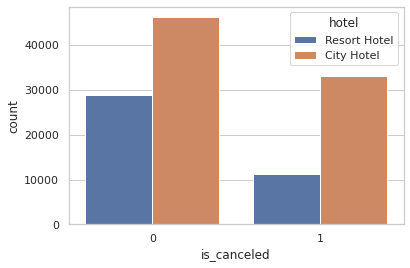

In [258]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue="hotel", data=df3)
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/fig1.png')

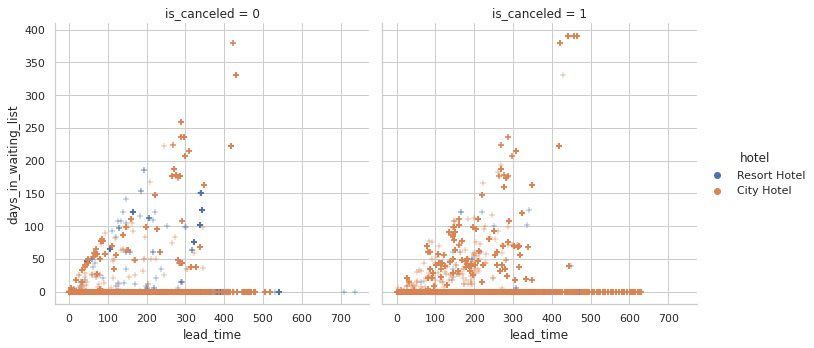

In [276]:
#ayuda y referencia: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
ax = sns.relplot(data=df3, x="lead_time", y="days_in_waiting_list", col='is_canceled',
                 kind="scatter", hue='hotel', marker="+")
#datos = 0 causan ruido

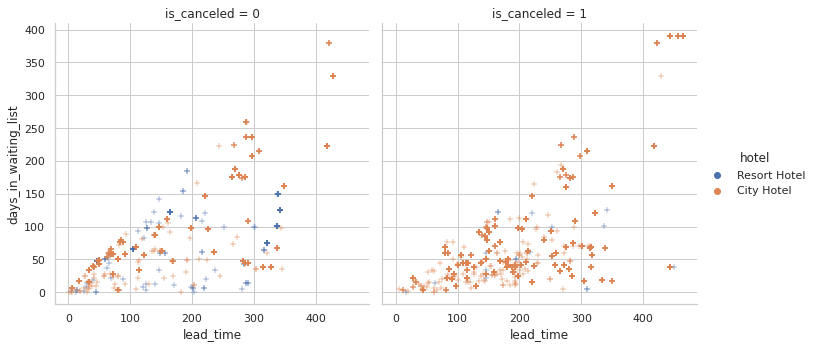

In [273]:
df3 = df2[['is_canceled','hotel', 'lead_time', 'days_in_waiting_list']]
ax = sns.relplot(data=df3[df3['days_in_waiting_list']!= 0], x="lead_time", y="days_in_waiting_list", col='is_canceled',
                 kind="scatter", hue='hotel', marker="+")
#se extraen los datos = 0 de la lista de espera, para ver correlacion
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/fig2.png')

### Reservas

In [314]:
df4 = df2[['previous_bookings_not_canceled', 'is_repeated_guest', 'total_of_special_requests', 'adr','arrival_date_week_number']]
df4.head()

,previous_bookings_not_canceled,is_repeated_guest,total_of_special_requests,adr,arrival_date_week_number
0,0,0,0,0.0,27
1,0,0,0,0.0,27
2,0,0,0,75.0,27
3,0,0,0,75.0,27
4,0,0,1,98.0,27


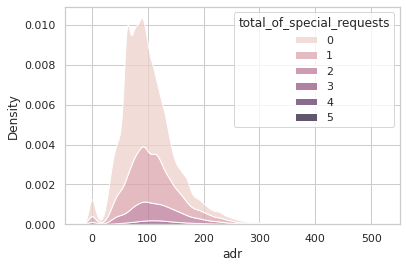

In [311]:
ax = sns.kdeplot(data=df4[df4['adr']<3000], x='adr', hue = 'total_of_special_requests', multiple="stack")
#La mayoria de gente que contrata los servicios tienen una tarifa diaria de 100
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/fig3.png')

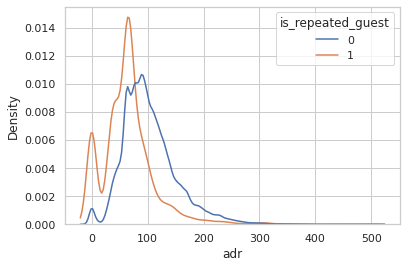

In [313]:
ax =sns.kdeplot(data=df4[df4['adr']<3000], x="adr", hue="is_repeated_guest",
    cumulative=False, common_norm=False, common_grid=True)
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/fig4.png')

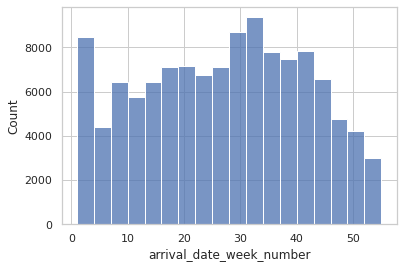

In [317]:
ax =sns.histplot(data=df4, x='arrival_date_week_number',binwidth=3)
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/fig5.png')